# Amazon Reviews Mini Project
### Ezgi Siir Kibris

In [516]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("amazon_reviews.csv",names=None)

data=data.dropna()
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [517]:
data['HelpfulnessRatio'] = data['HelpfulnessNumerator'] /data['HelpfulnessDenominator']

In [518]:
words=pd.Series(data["Text"])
words.map(len)
data['ReviewLength']=words.map(len)

In [519]:
sums=pd.Series(data["Summary"])
sums.str.len()
data['TitleLength']=sums.str.len()

In [520]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewLength,TitleLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,21
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,17
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,21
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,14
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,11


In [527]:
# Question 1.a.

data[["TitleLength","ReviewLength", "Score", "HelpfulnessRatio"]].describe().round(2)


,TitleLength,ReviewLength,Score,HelpfulnessRatio
count,568411.00,568411.00,568411.00,298372.00
mean,23.45,436.24,4.18,0.78
std,14.03,445.35,1.31,0.35
min,1.00,12.00,1.00,0.00
25%,13.00,179.00,4.00,0.60
50%,20.00,302.00,5.00,1.00
75%,30.00,527.00,5.00,1.00
max,128.00,21409.00,5.00,3.00


In [528]:
# Question 1.b.

#convert epoch time to date time
data['Date']=pd.to_datetime(data['Time'],unit='s')
data['MonthYear']= pd.to_datetime(data["Date"]).dt.to_period('m')
data['Year']= pd.to_datetime(data["Date"]).dt.to_period('y')

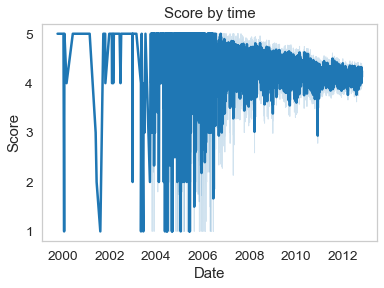

In [534]:
# Score by day over time
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(x = "Date", y = "Score",
                 data = data).set(title='Score by time');


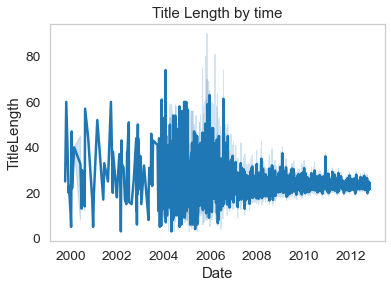

In [538]:
# Title length by day over time
sns.lineplot(x = "Date", y = "TitleLength",
             data = data).set(title='Title Length by time');

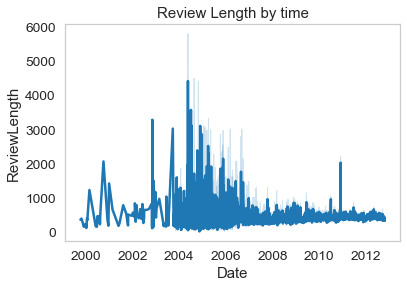

In [539]:
# Review length by day over time
sns.lineplot(x = "Date", y = "ReviewLength",
             data = data).set(title='Review Length by time');

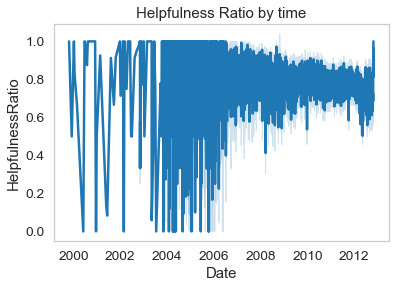

In [540]:
# Helpfulness ratio by day over time
sns.lineplot(x = "Date", y = "HelpfulnessRatio",
             data = data).set(title='Helpfulness Ratio by time');


In [542]:
## Figures 1-4 are line plots that show review length, title length, score and helpfulness ratio. I observe from the plots that there is a stabilization recently. There is less volatility in all four graphs. seems like less variance over years in scores, and review length. Since there are more reviews recently, scores, helpfulness ratio, title length, and review length converge to the mean.
## I am also surprised about  Table 1 which  shows that review scores are higher recently. I think this pattern is a result of rising social media culture. Companies send products and give money to influencers to make them write review. As a result of paid reviews, product scores may increased over years. Another possibility of rising scores is that companies take care of reviews in the past and increased the product quality significantly.


C:\Users\gokha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gokha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


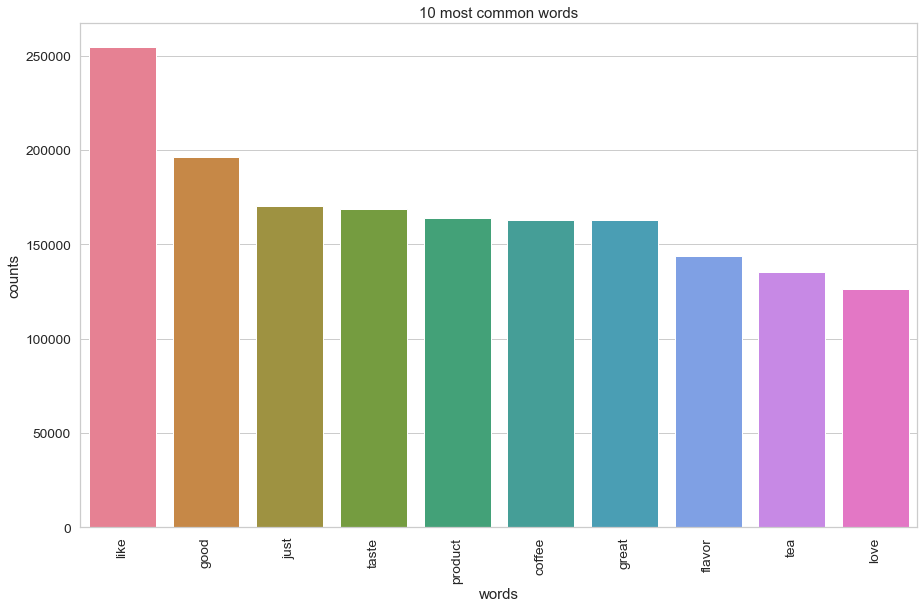

In [156]:
# Question 1.c.
lda_copy = data.copy(deep=True)
lda_copy.head()
# Removing punctiation and lower-casing text field without changing original dataframe.
import re
lda_copy=data["Text"]
lda_copy = lda_copy.map(lambda x: re.sub('[,.!?]|<br \/>\+|<br \/>', '', x))
lda_copy = lda_copy.map(lambda x: x.lower())
lda_copy.head()
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True) [0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc= {"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(lda_copy)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [546]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words -
                                                  1:-1]]))
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
coffee cup like good flavor taste great cups just strong

Topic #1:
tea like taste water drink flavor good just sugar product

Topic #2:
food dog product like cat dogs just treats good time

Topic #3:
product great like good just flavor use taste salt amazon

Topic #4:
like good taste chocolate great just love eat snack flavor


C:\Users\gokha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [543]:
# Question 1.e.
# Text cleaner function
from lemmatizer import clean_text
Text_clean = data['Text'].map(clean_text)
#Text_clean

In [544]:
Summary_clean = data['Summary'].map(clean_text)
Summary_clean

0                  good quality dog food
1                             advertised
2                           delight says
3                         cough medicine
4                            great taffy
                       ...              
568449                           without
568450                      disappointed
568451                  perfect maltipoo
568452    favorite training reward treat
568453                       great honey
Name: Summary, Length: 568411, dtype: object

In [160]:
import matplotlib.pyplot as plt

In [161]:

#Question 1.d.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [162]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(Text_clean)

In [163]:
#print(tfidf_vectorizer.get_feature_names_out())

In [164]:
n_components = 5
n_top_words = 10

#NMF Frobenious norm
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)


C:\Users\gokha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\gokha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\gokha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [165]:
# Plotting

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [166]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

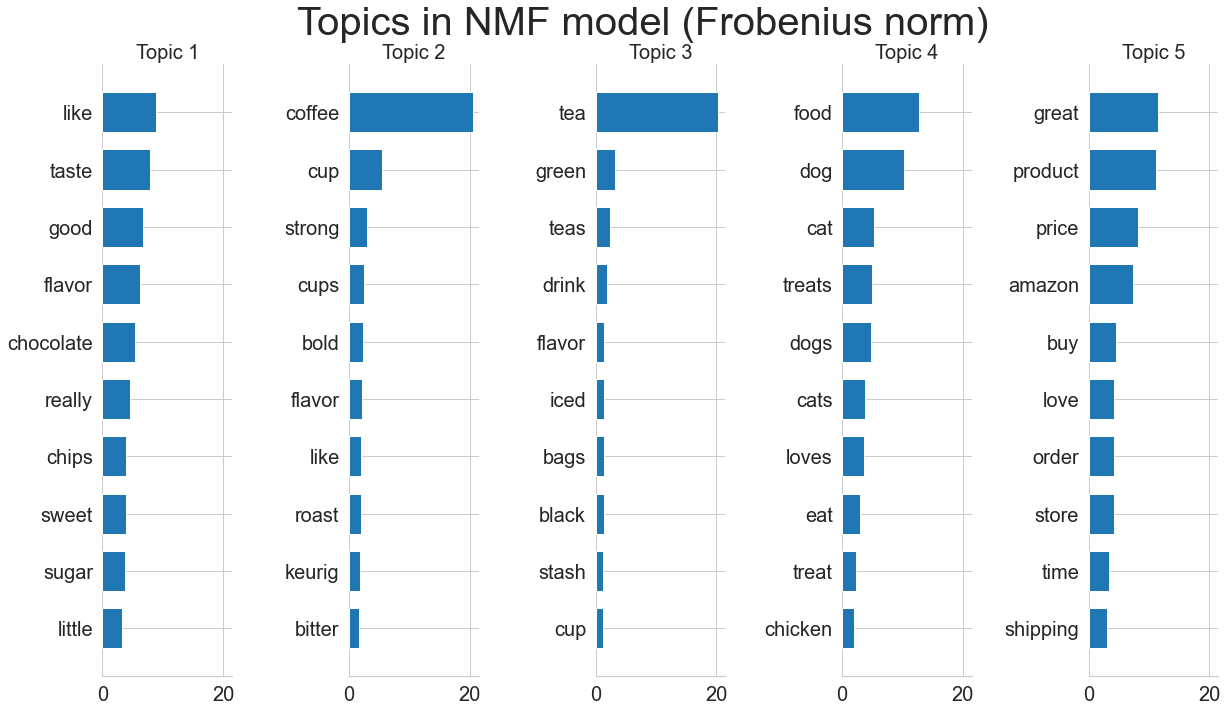

In [167]:
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

In [168]:
#NMF model with Kullback-Leibler Divergence

nmf2 = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)


C:\Users\gokha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\gokha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


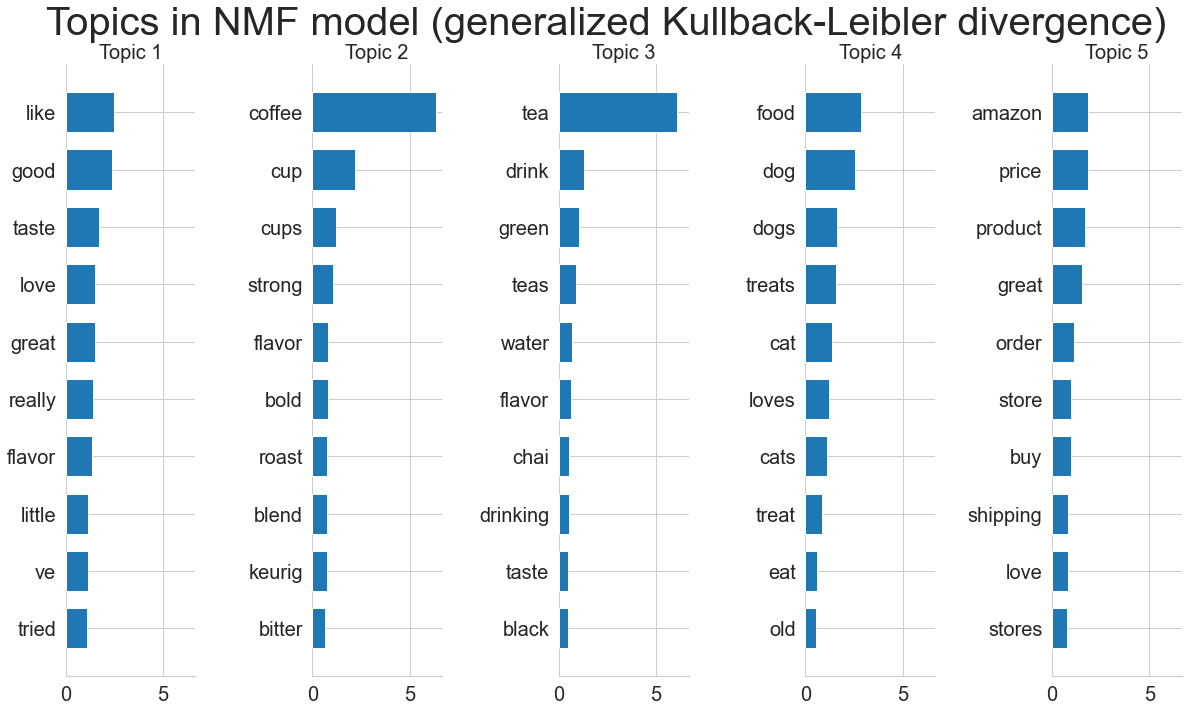

In [169]:

plot_top_words(
    nmf2,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

In [170]:
# Question 1.f.
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [545]:
# Question 1.e.

text1=Summary_clean

In [172]:
#text1

0                  good quality dog food
1                             advertised
2                           delight says
3                         cough medicine
4                            great taffy
                       ...              
568449                           without
568450                      disappointed
568451                  perfect maltipoo
568452    favorite training reward treat
568453                       great honey
Name: Summary, Length: 568411, dtype: object

In [547]:
text2=Text_clean

In [548]:
text2

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanuts  ...
2         confection around centuries light pillowy citr...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chicken good better resturants ea...
568450    disappointed flavor chocolate notes especially...
568451    stars small give 10-15 one training session tr...
568452    best treats training rewarding dog good groomi...
568453    satisfied product advertised use cereal raw vi...
Name: Text, Length: 568411, dtype: object

In [549]:
# Question 1.f.
cosine_similarities=[]
for i,j in zip(text1,text2):
    vector1 = text_to_vector(i)
    vector2 = text_to_vector(j)
    cosine= get_cosine(vector1, vector2)
    cosine_similarities.append(cosine)
    #print (cosine)


In [550]:
s=pd.Series(cosine_similarities)

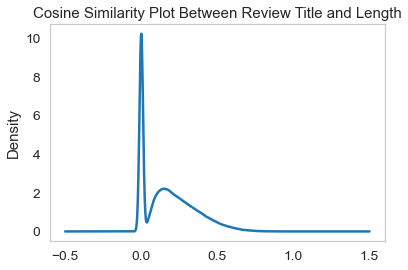

In [552]:
ax=s.plot.kde().set(title="Cosine Similarity Plot Between Review Title and Length");#density plot

In [553]:
#Part 2

#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()



In [554]:
#Sentiment scores of summary column
sentiment_summary=[]
for i in Summary_clean:
    compound=sentiment.polarity_scores(i)['compound']
    sentiment_summary.append(compound)

In [555]:
#Sentiment scores of text column
sentiment_text=[]
for i in Text_clean:
    compound=sentiment.polarity_scores(i)['compound']
    sentiment_text.append(compound)

In [556]:
data['SentimentSummary']=sentiment_summary

In [557]:
data['SentimentText']=sentiment_text

In [642]:
#  Part 2
#Models
data.corr()
sent=data[['SentimentSummary', 'SentimentText']]
sent.describe().round(2)

,SentimentSummary,SentimentText
count,568411.00,568411.00
mean,0.32,0.69
std,0.35,0.41
min,-0.95,-1.00
25%,0.00,0.62
50%,0.44,0.86
75%,0.62,0.94
max,0.99,1.00


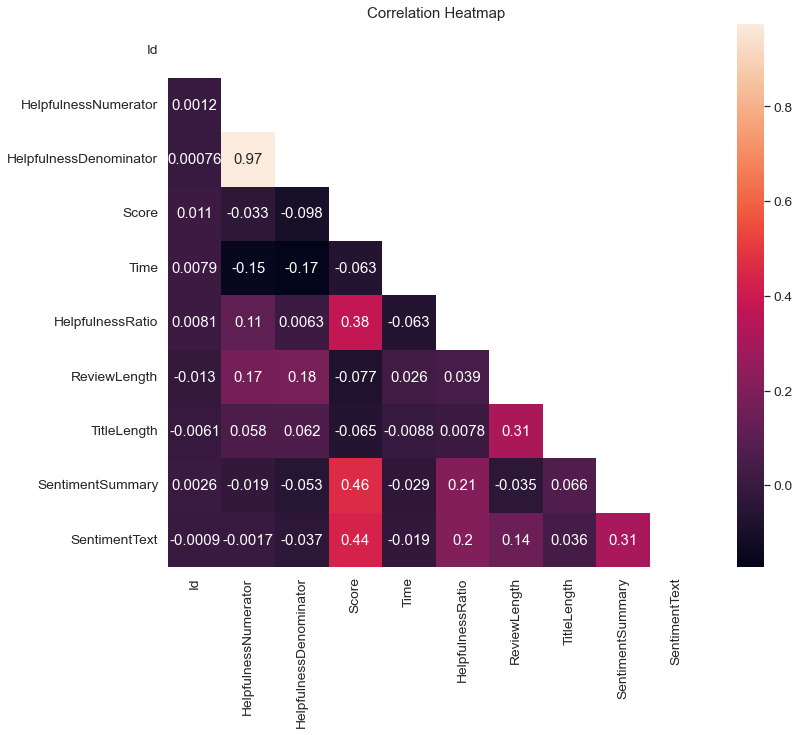

In [564]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(),annot=True,mask=mask).set(title="Correlation Heatmap");
# Generally speaking, pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.
#Then, it is not good idea put HelpfulnessDenominator and Helpfulness Numerator to the same model.

In [565]:
#Let's try linear models first

import statsmodels.formula.api as smf

In [566]:

model1 = smf.ols('Score ~ HelpfulnessNumerator', data=data)
model1= model1.fit()

model2 = smf.ols('Score ~ HelpfulnessDenominator', data=data)
model2 = model2.fit()

model3 = smf.ols('Score ~ Time', data=data)
model3 = model3.fit()

model4 = smf.ols('Score ~ HelpfulnessRatio', data=data)
model4 = model4.fit()

model5 = smf.ols('Score ~ ReviewLength', data=data)
model5 = model5.fit()

model6 = smf.ols('Score ~ TitleLength', data=data)
model6 = model6.fit()

model7 = smf.ols('Score ~ SentimentSummary', data=data)
model7 = model7.fit()

model8 = smf.ols('Score ~ SentimentText', data=data)
model8 = model8.fit()

In [567]:
#Compare RMSE
print(np.sqrt(model1.mse_resid))
print(np.sqrt(model2.mse_resid))
print(np.sqrt(model3.mse_resid))
print(np.sqrt(model4.mse_resid))
print(np.sqrt(model5.mse_resid))
print(np.sqrt(model6.mse_resid))
print(np.sqrt(model7.mse_resid))
print(np.sqrt(model8.mse_resid))

1.3096732854222515
1.3040866716823294
1.3077694894515042
1.3533512976689088
1.3064395959722095
1.3075901755258068
1.1614811676614276
1.17985829920686


In [568]:
model9 = smf.ols('Score ~ Time+SentimentSummary', data=data)
model9 = model9.fit()

model10 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessRatio', data=data)
model10 = model10.fit()

model11 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessNumerator', data=data)
model11 = model11.fit()

model12 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessDenominator', data=data)
model12 = model12.fit()

model13 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessDenominator+TitleLength+SentimentText', data=data)
model13 = model13.fit()

model14 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessDenominator+ReviewLength', data=data)
model14 = model14.fit()

model15 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessNumerator+TitleLength', data=data)
model15 = model15.fit()

model16 = smf.ols('Score ~ Time+SentimentSummary+TitleLength', data=data)
model16 = model16.fit()

model17 = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessDenominator+TitleLength+SentimentText+ReviewLength', data=data)
model17 = model17.fit()

model18 = smf.ols('Score ~ SentimentSummary+HelpfulnessDenominator+TitleLength+SentimentText+ReviewLength', data=data)
model18 = model18.fit()

In [569]:
print(np.sqrt(model9.mse_resid))
print(np.sqrt(model10.mse_resid))
print(np.sqrt(model11.mse_resid))
print(np.sqrt(model12.mse_resid))
print(np.sqrt(model13.mse_resid))
print(np.sqrt(model14.mse_resid))
print(np.sqrt(model15.mse_resid))
print(np.sqrt(model16.mse_resid))
print(np.sqrt(model17.mse_resid))#smallest
print(np.sqrt(model18.mse_resid))

1.1596785616677057
1.1953400233511347
1.158937312142452
1.1545452459684873
1.0751885264203003
1.152985738510914
1.152302169872325
1.1528052242728455
1.0709427674654934
1.0732575683668388


In [570]:
#Since model13 has the smallest RMSE, I am going to try it with LASSO and Ridge regressions

#Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
y = data['Score']
X = np.array(data['SentimentSummary'])
clf = Ridge(alpha=1.0)
clf.fit(X.reshape(-1,1), y)
pred = clf.predict(X.reshape(-1,1))


In [571]:
from sklearn.metrics import mean_squared_error
rmse_ridge1 = np.sqrt(mean_squared_error(y,pred))

In [572]:
rmse_ridge1

1.161479124310006

In [573]:
X2 = data[['SentimentSummary','HelpfulnessDenominator']]
y = data['Score']
clf2 = Ridge(alpha=1.0)
clf2.fit(X2, y)
pred2 = clf2.predict(X2)

In [574]:
rmse_ridge2 = np.sqrt(mean_squared_error(y,pred2))

In [575]:
rmse_ridge2

1.157504568223123

In [576]:
X3 = data[['SentimentSummary','HelpfulnessDenominator', 'Time']]
y = data['Score']
clf3 = Ridge(alpha=1.0)
clf3.fit(X3, y)
pred3 = clf3.predict(X3)
rmse_ridge3 = np.sqrt(mean_squared_error(y,pred3))
rmse_ridge3

C:\Users\gokha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.24528e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


1.1545411836331063

In [577]:
X4 = data[['SentimentSummary','HelpfulnessDenominator', 'Time', 'TitleLength','SentimentText', 'ReviewLength']]
y = data['Score']
clf4 = Ridge(alpha=1.0)
clf4.fit(X4, y)
pred4 = clf4.predict(X4)
rmse_ridge4 = np.sqrt(mean_squared_error(y,pred4))
rmse_ridge4 #smaller than linear model for now
pred4

C:\Users\gokha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.7092e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


array([4.67924125, 2.95747665, 4.8185156 , ..., 4.63957723, 5.14887727,
       4.43092334])

In [586]:
#pred4_new=pd.DataFrame(pred4)
#pred4_new.to_csv("pred4_new.csv")

In [587]:
# Let's try with LASSO

from sklearn.linear_model import Lasso

X4 = data[['SentimentSummary','HelpfulnessDenominator', 'Time', 'TitleLength','SentimentText', 'ReviewLength']]
y = data['Score']
lasso1 = Lasso(alpha=1.0)
lasso1.fit(X4, y)
lasso1_pred = lasso1.predict(X4)
rmse_lasso1 = np.sqrt(mean_squared_error(y,lasso1_pred))
rmse_lasso1

1.3035612839461732

In [588]:
X3 = data[['SentimentSummary','HelpfulnessDenominator', 'Time']]
y = data['Score']
lasso2 = Lasso(alpha=1.0)
lasso2.fit(X3, y)
lasso2_pred = lasso2.predict(X3)
rmse_lasso2 = np.sqrt(mean_squared_error(y,lasso2_pred))
rmse_lasso2

1.305505130307818

In [589]:
X1 = np.array(data['SentimentSummary'])
y = data['Score']
lasso3 = Lasso(alpha=1.0)
lasso3.fit(X1.reshape(-1, 1), y)
lasso3_pred = lasso3.predict(X1.reshape(-1, 1))
rmse_lasso3 = np.sqrt(mean_squared_error(y,lasso3_pred))
rmse_lasso3

1.310367233640401

In [590]:
# I cannot get better solution with LASSO than Ridge and Linear model

In [591]:
#Let's try normalization
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
data2=data[['HelpfulnessDenominator', 'Score', 'Time','TitleLength','ReviewLength','SentimentSummary', 'SentimentText']]
names=data2.columns
d=scaler.fit_transform(data2)
scaled_data=pd.DataFrame(d,columns=names)
scaled_data.head()

,HelpfulnessDenominator,Score,Time,TitleLength,ReviewLength,SentimentSummary,SentimentText
0,0.001083,1.00,0.885043,0.157480,0.011731,0.717429,0.970738
1,0.000000,0.00,0.989721,0.125984,0.008319,0.490466,0.448529
2,0.001083,0.75,0.679043,0.157480,0.023228,0.799371,0.903711
3,0.003250,0.25,0.894902,0.102362,0.009674,0.490466,0.720188
4,0.000000,1.00,0.998951,0.078740,0.005982,0.812513,0.973489


In [592]:
model17_scaled = smf.ols('Score ~ Time+SentimentSummary+HelpfulnessDenominator+TitleLength+SentimentText+ReviewLength', data=scaled_data)
model17_scaled = model17_scaled.fit()
print(np.sqrt(model17_scaled.mse_resid))#smallest

0.26773569186637336


In [593]:
X5 = scaled_data[['SentimentSummary','HelpfulnessDenominator', 'Time', 'TitleLength','SentimentText', 'ReviewLength']]
y = scaled_data['Score']
clf5 = Ridge(alpha=1.0)
clf5.fit(X5, y)
pred5 = clf5.predict(X5)
rmse_ridge5 = np.sqrt(mean_squared_error(y,pred5))
rmse_ridge5 #smaller than linear model for now

0.2677343584003719

In [595]:
pred5=pd.DataFrame(pred5)
pred5


,0
0,0.919760
1,0.489305
2,0.954484
3,0.646263
4,0.992271
...,...
568406,0.782740
568407,0.200360
568408,0.909943
568409,1.037198


In [596]:
pred5["prediction"]= pd.cut(pred5[0], bins=[0, 0.25, 0.50,0.75,1, float('Inf')], labels=['1', '2', '3','4','5'])

In [597]:
pred5

,0,prediction
0,0.919760,4
1,0.489305,2
2,0.954484,4
3,0.646263,3
4,0.992271,4
...,...,...
568406,0.782740,4
568407,0.200360,1
568408,0.909943,4
568409,1.037198,5


In [605]:
pred5_v2 = pd.read_csv("pred5_v2.csv",names=None)

In [606]:
pred5_v2

,scaled,predicted
0,0.919760,4
1,0.489305,2
2,0.954484,4
3,0.646263,3
4,0.992271,4
...,...,...
568406,0.782740,4
568407,0.200360,1
568408,0.909943,4
568409,1.037198,5


In [ ]:
from sklearn.metrics import confusion_matrix
y_true=data['Score']
y_pred=pred5_v2['predicted']
confused=confusion_matrix(y_true, y_pred)
confused

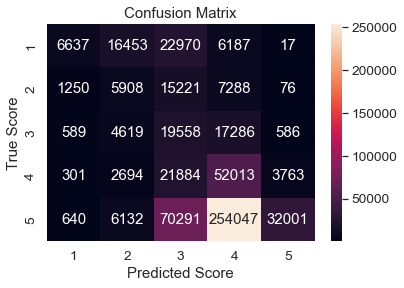

In [637]:
ax= plt.subplot()
sns.heatmap(confused, annot=True,fmt='g')# g disables scientific notation
ax.set_xlabel('Predicted Score');ax.set_ylabel('True Score');
ax.xaxis.set_ticklabels(['1', '2','3','4','5']); ax.yaxis.set_ticklabels(['1', '2','3','4','5']);
ax.set_title("Confusion Matrix");

In [604]:
#pred5.to_csv('pred5_v2.csv')

In [598]:
#from sklearn.decomposition import PCA
#pca     = PCA(n_components=4).fit(scaled_data)
#pca.fit

In [599]:
#pred5=pd.DataFrame(pred5)


In [600]:
#pred5

In [601]:
#pred55=5*pred5

In [602]:
#pred55

In [603]:
#pred56=pred55.round()

In [607]:
#pred56

#pred56.to_csv('pred56.csv')



In [507]:
#pred57=pd.read_csv("pred56.csv",names=None)
#pred57
#nmerge = sample.merge(pred57, on='Id', how='left')

In [509]:
#nmerge
#nmerge.to_csv('submit4.csv')

In [477]:
#pred6["prediction"]= pd.cut(pred5[0], bins=[0, 0.25, 0.50,0.75,1, float('Inf')], labels=['1', '2', '3','4','5'])

In [451]:
#sample = pd.read_csv("SampleSubmission.csv",names=None)

In [610]:
#sample

In [611]:
#nmerge = sample.merge(pred7, on='Id', how='left')

In [612]:
#nmerge

In [613]:
#nmerge.to_csv('submit.csv')

In [614]:
#from sklearn.metrics import confusion_matrix
#y_true=data['Score']
#y_pred=pred44
#confusion_matrix(y_true, y_pred)

In [615]:
#pred4['Id']=data['Id']

In [616]:
#pred4


In [617]:
#pred4["prediction"]= pd.cut(pred4[0], bins=[1, 2, 3,4,5, float('Inf')], labels=['1', '2', '3','4','5'])

In [618]:
#pred4['round']=pred4[0].round()

In [ ]:
#pred4

In [487]:
#pred4.to_csv('pred4.csv')

In [488]:
#pred4_round = pd.read_csv("pred4.csv",names=None)

In [619]:
#pred4_round

In [620]:
#nmerge = sample.merge(pred4_round, on='Id', how='left')

In [621]:
#nmerge

In [622]:
#nmerge.to_csv('submit2.csv')